In [1]:
#import the required models
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
#load of data
digits= datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
#determine the target of our data
print(digits.target)

[0 1 2 ... 8 9 8]


In [4]:
x=digits.data
y=digits.target

In [5]:
#showing the pixel of number you enter

di=digits.images[8]


Text(0.5, 1.0, 'number:8')

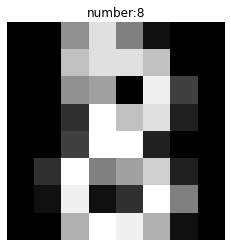

In [6]:
#representation of the emage of pixel
plt.imshow(di,cmap='gray')
plt.axis('off')
plt.title('number:'+str(y[8]))

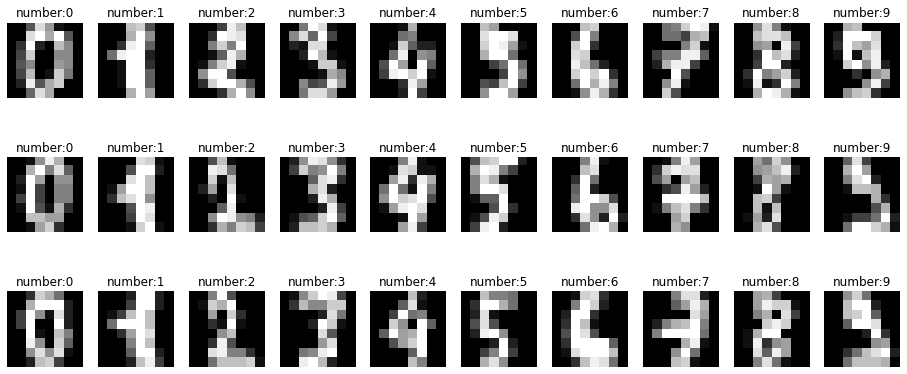

In [7]:
#generate images for the first 30 numbers
image,axes = plt.subplots(3,10,figsize=(16,7))
for a,image,number in zip(np.ravel(axes,order='C'),digits.images,y):
    a.imshow(image[:], cmap = 'gray')
    a.axis('off')
    a.set_title('number:'+str(number))

In [8]:
#import tensorflow
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.20)

In [12]:
# dimensionality reduction on digits dataset
from sklearn import manifold
T = manifold.TSNE(n_components=2)
X_T = T.fit_transform(x_train)

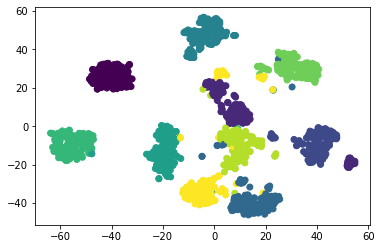

In [13]:
plt.scatter(X_T[:,0], X_T[:,1],c=y_train)

In [14]:
#fit the model
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
#make predictions in the test dataset
y_pred=log_reg.predict(x_test)
y_pred

array([7, 5, 5, 8, 0, 2, 3, 0, 1, 0, 6, 5, 6, 5, 3, 8, 1, 0, 4, 2, 3, 0,
       2, 9, 4, 9, 5, 9, 4, 6, 3, 2, 4, 4, 5, 3, 3, 7, 5, 4, 7, 9, 8, 4,
       3, 1, 0, 4, 7, 2, 8, 9, 4, 7, 7, 8, 4, 2, 9, 2, 3, 3, 9, 1, 1, 7,
       3, 0, 2, 5, 1, 9, 3, 3, 3, 5, 3, 1, 8, 5, 2, 3, 5, 3, 1, 8, 0, 1,
       2, 4, 9, 7, 5, 3, 1, 7, 9, 7, 7, 1, 2, 1, 1, 0, 9, 8, 3, 8, 0, 0,
       0, 6, 8, 7, 2, 0, 8, 4, 9, 8, 2, 4, 3, 9, 9, 6, 1, 1, 9, 4, 4, 6,
       0, 2, 4, 0, 0, 7, 0, 8, 1, 8, 4, 2, 7, 0, 4, 3, 3, 6, 8, 2, 6, 4,
       5, 1, 3, 6, 6, 4, 6, 9, 2, 7, 7, 2, 2, 2, 1, 5, 4, 4, 7, 1, 6, 4,
       3, 8, 6, 9, 8, 2, 6, 8, 7, 5, 7, 3, 7, 6, 8, 9, 0, 5, 9, 7, 2, 1,
       7, 4, 8, 5, 6, 5, 8, 9, 9, 9, 3, 1, 3, 4, 7, 6, 2, 0, 8, 8, 0, 0,
       1, 3, 9, 1, 2, 2, 3, 5, 7, 0, 1, 0, 8, 5, 7, 9, 2, 2, 5, 1, 3, 1,
       2, 5, 9, 5, 6, 6, 2, 8, 0, 9, 5, 3, 8, 0, 4, 5, 6, 0, 1, 4, 1, 6,
       5, 2, 2, 8, 6, 7, 8, 5, 8, 4, 3, 4, 5, 7, 2, 7, 5, 7, 6, 1, 4, 6,
       7, 5, 3, 8, 0, 5, 5, 5, 9, 0, 5, 7, 9, 3, 6,

In [17]:
x_pred = T.fit_transform(x_test)

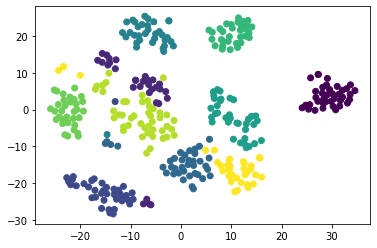

In [18]:
#visualization of the expected result
plt.scatter(x_pred[:,0], x_pred[:,1], c=y_test)

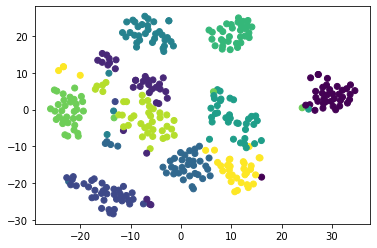

In [19]:
#visualization of the result obtained
plt.scatter(x_pred[:,0], x_pred[:,1], c=y_pred)

In [20]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)
cf

array([[36,  0,  0,  0,  0,  1,  0,  1,  0,  0],
       [ 0, 30,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  3,  0,  0,  2,  0,  0,  1, 39,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0, 34]], dtype=int64)

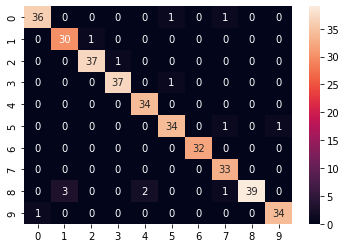

In [21]:
import seaborn as sns
s= sns.heatmap(cf,annot=True)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.91      0.97      0.94        31
           2       0.97      0.97      0.97        38
           3       0.97      0.97      0.97        38
           4       0.94      1.00      0.97        34
           5       0.94      0.94      0.94        36
           6       1.00      1.00      1.00        32
           7       0.92      1.00      0.96        33
           8       1.00      0.87      0.93        45
           9       0.97      0.97      0.97        35

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [23]:
from sklearn import metrics
ac=metrics.accuracy_score(y_test,y_pred)
print(ac)

0.9611111111111111
